In [6]:
import torch
from normalizing_flows import Flow
from normalizing_flows.architectures import RealNVP
import matplotlib.pyplot as plt
import numpy as np

In [33]:

torch.manual_seed(0)

n_data = 1000
n_dim = 3

x = torch.randn(n_data, n_dim)  # Generate some training data
bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(x)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(x)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points


# print head of x
print(x.shape)

torch.Size([1000, 3])


In [48]:
print(x)

tensor([[-1.1258, -1.1524, -0.2506],
        [-0.4339,  0.8487,  0.6920],
        [-0.3160, -2.1152,  0.3223],
        ...,
        [ 1.2965, -0.1078,  0.7482],
        [-0.7423,  0.3447,  1.6422],
        [-0.3266,  0.3669, -0.7245]])


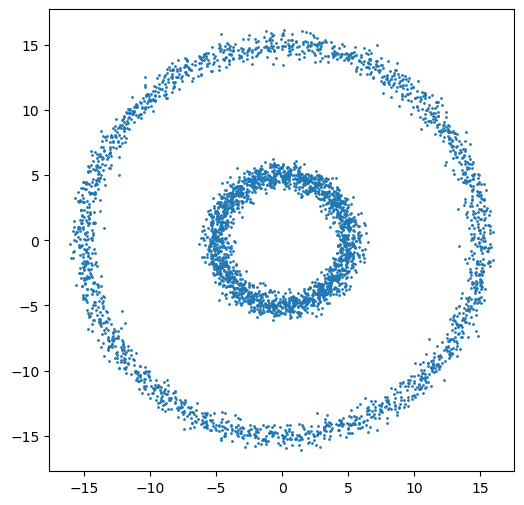

In [51]:
def generate_circular_data(num_points, radius, noise_factor):
    # Generate angles uniformly
    angles = np.linspace(0, 2*np.pi, num_points)
    
    # Create points in polar coordinates
    x = radius * np.cos(angles)
    y = radius * np.sin(angles)
    
    # Add noise to the points
    x += np.random.normal(0, noise_factor, num_points)
    y += np.random.normal(0, noise_factor, num_points)
    
    return x, y

# Number of points, radius of the circle, and noise factor
num_points = 2000
radius = 5
noise_factor = 0.5

# Generate the dataset
data1 = generate_circular_data(num_points, radius, noise_factor)
data2= generate_circular_data(num_points, radius*3, noise_factor)

# Concatenate the two datasets
data = np.concatenate((data1, data2), axis=1)

# Plot the generated points
plt.figure(figsize=(6,6))
plt.scatter(data[0], data[1], s=1)
plt.show()

In [54]:
torch.manual_seed(0)

data_tensor = torch.tensor(np.stack(data, axis=1)).float()  # Generate some training data

n_data = num_points * 2
n_dim = 2

bijection = RealNVP(n_dim)  # Create the bijection
flow = Flow(bijection)  # Create the normalizing flow

flow.fit(data_tensor)  # Fit the normalizing flow to training data
log_prob = flow.log_prob(data_tensor)  # Compute the log probability of training data
x_new = flow.sample(50)  # Sample 50 new data points

print(log_prob.shape)  # (100,)


torch.Size([4000])


In [61]:
print(x_new.shape) 

(1000, 2)


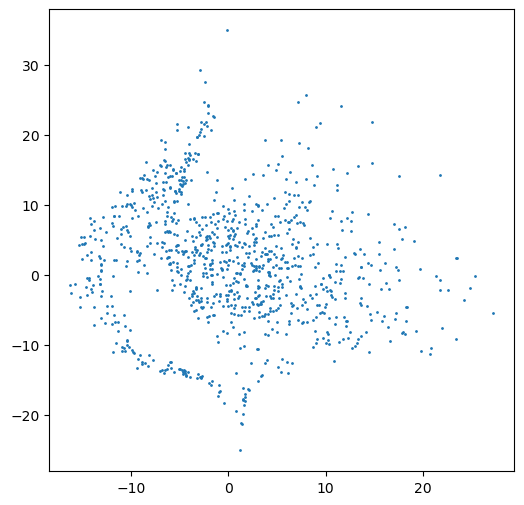

In [59]:
x_new = flow.sample(1000)  # Sample 50 new data points

# revert x_new to numpy array
x_new = x_new.detach().numpy()

# plot new data
plt.figure(figsize=(6,6))
plt.scatter(x_new[:,0], x_new[:,1], s=1)
plt.show()

In [73]:
# print all parts of bijection one by one


tensor([ 4.4869e+00, -4.2318e-03])
(tensor([ 0.5152, -0.3075], grad_fn=<AddBackward0>), tensor(-4.1728, grad_fn=<AddBackward0>))


In [74]:
def generate_grid_data(x_range, y_range, x_tick, y_tick):
    # Generate x and y values for the grid
    x_values = torch.linspace(x_range[0], x_range[1], x_tick)
    y_values = torch.linspace(y_range[0], y_range[1], y_tick)
    
    # Create grid points
    grid_points = torch.cartesian_prod(x_values, y_values)
    
    return grid_points

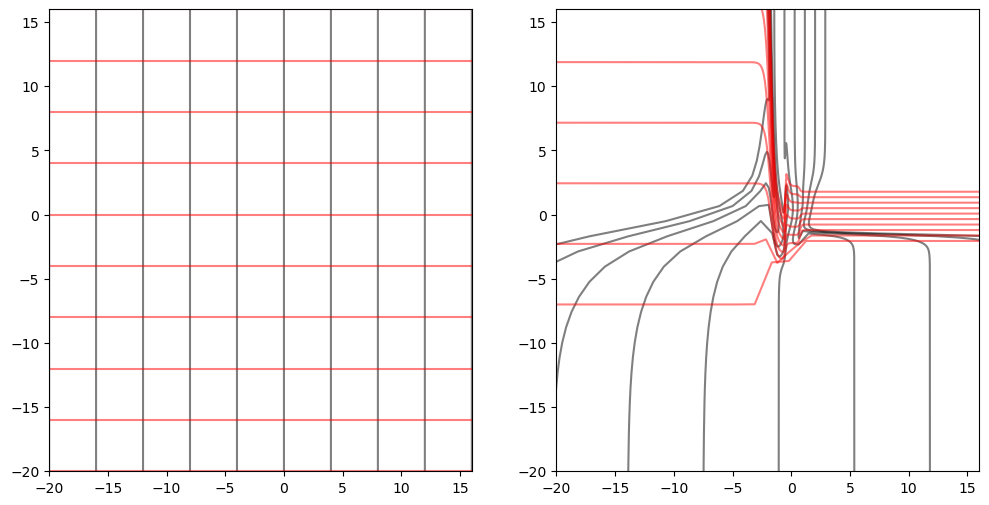

In [115]:
# Define parameters
x_range = range(-20, 20, 4)  # Range of values to cover in x coordinates
y_range = range(-20, 20, 4)  # Range of values to cover in y coordinates
line_density = 10000  # Number of points to generate in each direction
bottom_limit = -5000 # bottom limit for the line creation
upper_limit = 5000 # upper limit for the line creation

# create 2 seperate plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# limit plot to the range of x and y
ax1.set_xlim(x_range[0], x_range[-1])
ax1.set_ylim(y_range[0], y_range[-1])
ax2.set_xlim(x_range[0], x_range[-1])
ax2.set_ylim(y_range[0], y_range[-1])

for x in x_range:
    # generate a line of points along the y-axis at x
    y = torch.linspace(bottom_limit, upper_limit, line_density)
    x_plt = torch.ones_like(y) * x
    
    # plot the line on the first plot
    ax1.plot(x_plt, y, color='black', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x_plt, y), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='black', alpha=0.5)

# add grid of y dircetion too but on same plots
for y in y_range:
    # generate a line of points along the x-axis at y
    x = torch.linspace(bottom_limit, upper_limit, line_density)
    y_plt = torch.ones_like(x) * y
    
    # plot the line on the first plot
    ax1.plot(x, y_plt, color='red', alpha=0.5)

    # transform the line using the flow
    grid_points = torch.stack((x, y_plt), dim=1)
    transformed_points = flow.bijection(grid_points)

    # revert transformed_points to numpy array
    transformed_points = transformed_points[0].detach().numpy()
    transformed.append(transformed_points)

    # plot the transformed line on the second plot
    ax2.plot(transformed_points[:,0], transformed_points[:,1], color='red', alpha=0.5)

plt.show()